In [2]:
import os
import pyreadr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import statistics
import rpy2.robjects as ro
import rpy2.robjects.packages as rpackages
from rpy2.robjects import pandas2ri

In [3]:
os.chdir('/Users/mstring/GitHub/FHNW-2023/Statistics/data')
!ls -l

total 96
-rw-r--r--@ 1 mstring  staff  17829 Oct 13 15:47 SimpleReg.RData
-rw-r--r--@ 1 mstring  staff  23881 Oct 13 15:48 housingprices.txt
-rw-r--r--@ 1 mstring  staff   3212 Oct 20 08:41 ticketprices.txt


## Exercise Template

---

## Just an Exercise 

In [ ]:
import scipy.stats as stats

# set seed
np.random.seed(1234)

# generate 100 random numbers
x = np.random.normal(size=100)

# plot histogram
plt.hist(x)
plt.show()

# generate QQ plot
stats.probplot(x, plot=plt)
plt.show()


---

## Class Exercise Law of Lagre Numbers

In [ ]:
# Show the approximation to 0.5 with a large number of tosses
# Empirical Probability
# Number of tosses
n_tosses = 1000

# Simulate coin tosses (0 = tails, 1 = heads)
tosses = np.random.randint(0, 2, size=n_tosses)

# Calculate cumulative sum of heads
cumulative_heads = np.cumsum(tosses)

# Calculate proportion of heads
proportion_heads = cumulative_heads / np.arange(1, n_tosses + 1)

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the proportion of heads
ax.semilogx(np.arange(1, n_tosses + 1), proportion_heads)

# Set labels and title
ax.set_xlabel('Number of Tosses (log scale)')
ax.set_ylabel('Proportion of Heads')
ax.set_title('Proportion of Heads in Coin Toss Simulation')

# Show the plot
plt.show()


---

The equation for a log-log regression model is:

$$\log(y_i) = b_0 + b_1 \cdot \log(x_i) + e_i$$

Here's how the terms correspond:

- $\log(y_i)$ is the natural logarithm of the dependent variable.
- $b_0$ is the y-intercept.
- $b_1$ is the slope of the line.
- $\log(x_i)$ is the natural logarithm of the independent variable.
- $e_i$ is the error term, which accounts for the difference between the observed and predicted values.

In this model, a one percent change in $x_i$ is associated with a $b_1$ percent change in $y_i$. This is because when both $y_i$ and $x_i$ are logged, the coefficient $b_1$ can be interpreted as an elasticity. The error term $e_i$ accounts for any random variation not explained by the model.

This model assumes that the relationship between $\log(x_i)$ and $\log(y_i)$ is linear. It's often used in situations where the effect of changes in the independent variable on the dependent variable are multiplicative rather than additive. The coefficients $b_0$ and $b_1$ are estimated from the data.

Please note that this interpretation assumes that all other assumptions of linear regression (such as independence of errors) are met. If these assumptions are violated, then this interpretation may not be valid.

In [ ]:
# Filter the data to include only tenants
dfr_filter = dfr[dfr['TENANT'] == 'tenant']
print(dfr_filter)

In [ ]:
# Handle missing or infinite values which might result from the conversion or the log transformation:
dfr_filter = dfr_filter.replace([np.inf, -np.inf], np.nan)
dfr_filter = dfr_filter.dropna(subset=['RENT','HOUSEHOLD_INCOME'])

In [ ]:
print(dfr_filter[['HOUSEHOLD_INCOME']])

In [ ]:
print(dfr_filter['RENT'])

In [ ]:
# Independent Variable X (Provide)
# Apply a log transformation to the 'Bedrooms' column
x = np.log(dfr_filter[['HOUSEHOLD_INCOME']])

In [ ]:
# Dependent Variable Y (Predict)
# Apply a log transformation to the 'Price' column
y = np.log(dfr_filter[['RENT']])

In [ ]:
# Create a LinearRegression object
model = LinearRegression()

# Fit the model
model.fit(x, y)

In [ ]:
# Plot the values and linear regression
plt.scatter(x,y)
plt.plot(x, model.predict(x), c='red')

In [ ]:
# Print y-intercept
# One dimensional array - specify which element before convert. to int
print('y-Intercept = ' + str(float(model.intercept_[0])))

# Print slope
# Two dimensional array - specify which element before convert. to int
print('Slope = ' + str(float(model.coef_[0][0])))

In [ ]:
# Predict certain value
def predicted_y(value):
    predict = model.coef_ * value + model.intercept_
    return predict

# Insert value into function
int(predicted_y(3)[0][0])

---

## Exercise calculate mean of a sample from R Base data

Take random sample of size 10 from iris dataset

Calculate sepal lenght average

In [6]:
from sklearn import datasets
iris = datasets.load_iris()

import random
index = random.sample(range(iris.data.shape[0]), 10)


In [7]:
print(index)

[87, 134, 5, 75, 28, 126, 20, 116, 3, 148]


In [8]:
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [9]:
print(df_iris.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [14]:
values = random.sample(list(df_iris['sepal length (cm)']), 10)
values = list(df_iris['sepal length (cm)'].iloc[index])


In [15]:
print(values)

[6.3, 6.1, 5.4, 6.6, 5.2, 6.2, 5.4, 6.5, 4.6, 6.2]


In [13]:
mean = np.mean(values)
print(mean)

5.8500000000000005


---

## Simple Linear Regression Exercise 1 (L3+4)

Load SimpleReg.RData

In [36]:
# Importing R Data:
rdata = pyreadr.read_r('SimpleReg.RData')
print(rdata.keys())

odict_keys(['dat'])


In [37]:
# Converting R Data to a Dataframe:
dfr = (rdata['dat'])
print(dfr)

      TENANT RENT  HOUSEHOLD_INCOME
0      owner  NaN      15700.280447
1     tenant  450       8724.000000
2     tenant  383      46234.738788
3      owner  NaN       9602.000000
4      owner  NaN      13204.668742
...      ...  ...               ...
2255   owner  NaN      31281.600000
2256   owner  NaN      33799.347338
2257   owner  NaN      15500.000000
2258   owner  NaN      57155.307740
2259   owner  NaN      67895.600000

[2260 rows x 3 columns]


In [38]:
# Apply a filter if needed
df_filter = dfr[dfr['TENANT'] == 'tenant']
print(df_filter)

      TENANT RENT  HOUSEHOLD_INCOME
1     tenant  450       8724.000000
2     tenant  383      46234.738788
5     tenant  120       9600.000000
7     tenant  410      30991.848400
12    tenant  180       6840.000000
...      ...  ...               ...
2243  tenant  500      25165.157574
2244  tenant  100      53332.948259
2247  tenant  200      33290.000000
2250  tenant  370       1290.000000
2253  tenant  700      21000.000000

[853 rows x 3 columns]


In [34]:
# Handle missing or infinite values which might result from the conversion or the log transformation:
df_filter = df_filter.replace([np.inf, -np.inf], np.nan)
df_filter = df_filter.dropna(subset=['RENT','HOUSEHOLD_INCOME'])

In [26]:
# Independent Variable X (Provide)
# Apply a log transformation to the 'Bedrooms' column
x = np.log(df_filter[['RENT']])

# Dependent Variable Y (Predict)
# Apply a log transformation to the 'Price' column
y = np.log(df_filter[['HOUSEHOLD_INCOME']])

# Create a LinearRegression object
model = LinearRegression()

# Fit the model
model.fit(x, y)

LinearRegression()

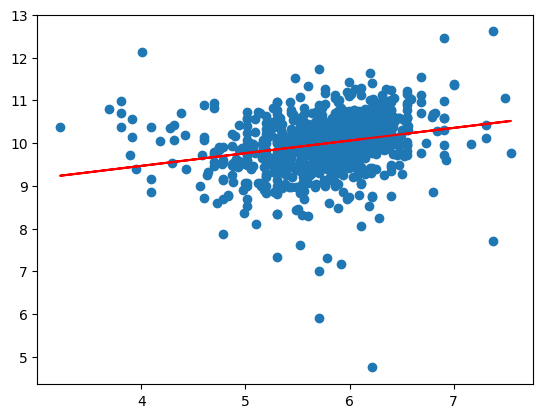

In [27]:
# Plot the values and linear regression
plt.scatter(x,y)
plt.plot(x, model.predict(x), c='red')

In [39]:
print(df_filter)

      TENANT RENT  HOUSEHOLD_INCOME
1     tenant  450       8724.000000
2     tenant  383      46234.738788
5     tenant  120       9600.000000
7     tenant  410      30991.848400
12    tenant  180       6840.000000
...      ...  ...               ...
2243  tenant  500      25165.157574
2244  tenant  100      53332.948259
2247  tenant  200      33290.000000
2250  tenant  370       1290.000000
2253  tenant  700      21000.000000

[853 rows x 3 columns]


In [40]:
r = df_filter[['RENT', 'HOUSEHOLD_INCOME']].corr()
print(r)

                      RENT  HOUSEHOLD_INCOME
RENT              1.000000          0.317712
HOUSEHOLD_INCOME  0.317712          1.000000


---

## Exercise Template

---